# Desafio 1 - Maratona Behind the Code 2021

## **1. Definição do Problema de Negócio**

O desafio de negócio foi proposto pela Bantonal, a plataforma bancária lider na América Latina, e tem como objetivo realizar a criação de um modelo de Machine Learning capaz de realisar uma análise de risco para predizer se um empréstimo a um cliente deve ser feito ou não, sendo assim, um modelo supervisionado de classificação.

O modelo deverá ser treinado com os conjuntos de dados disponibilizados no repositório do [Github](https://github.com/maratonadev/desafio-1-2021) com informações relacionadas ao perfil do cliente, destinos de crédito, atividade de trabalho, rendimentos, condições de habitação, entre outros dados demográficos.

Segundo a documentação no Github, o nosso modelo deverá receber como entrada os seguintes atributos :
```
  "ID",
  "CHECKING_BALANCE",
  "PAYMENT_TERM",
  "CREDIT_HISTORY",
  "LOAN_PURPOSE",
  "LOAN_AMOUNT",
  "EXISTING_SAVINGS",
  "EMPLOYMENT_DURATION",
  "INSTALLMENT_PERCENT",
  "SEX",
  "OTHERS_ON_LOAN",
  "CURRENT_RESIDENCE_DURATION",
  "PROPERTY",
  "AGE",
  "INSTALLMENT_PLANS",
  "HOUSING",
  "EXISTING_CREDITS_COUNT",
  "JOB_TYPE",
  "DEPENDENTS",
  "TELEPHONE",
  "FOREIGN_WORKER"
```

## 2. Importação de Bibliotecas e Dados

### **2.1 Instalação de Bibliotecas**
Para realizar a instalação, deve-se remover o "#" anterior ao comando ```!pip install...```

In [105]:
# !pip install category_encoders
# !pip install imbalanced-learn
# !pip install mlxtend
# !pip install scikit-optimize

### 2.2 Importação de Bibliotecas

In [106]:
# Manipulação dos dados
import pandas as pd

# Pacote matemático
import numpy as np

# Visualizações Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **2.2 Importação de Dados**

In [107]:
#loans = pd.read_csv(client_b9d7a2c3c3ea4ce98b62f13e5c97f2b9.get_object(Bucket='desafio01projeto-donotdelete-pr-tq3vgxjmhr4tdv',Key='LOANS.csv')['Body'])
#demographics = pd.read_csv(client_b9d7a2c3c3ea4ce98b62f13e5c97f2b9.get_object(Bucket='desafio01projeto-donotdelete-pr-tq3vgxjmhr4tdv',Key='DEMOGRAPHICS.csv')['Body'])
#accounts = pd.read_csv(client_b9d7a2c3c3ea4ce98b62f13e5c97f2b9.get_object(Bucket='desafio01projeto-donotdelete-pr-tq3vgxjmhr4tdv',Key='ACCOUNTS.csv')['Body'])

loans = pd.read_csv('data/LOANS.csv')
demographics = pd.read_csv('data/DEMOGRAPHICS.csv')
accounts = pd.read_csv('data/ACCOUNTS.csv')
answers = pd.read_csv('data/ANSWERS.csv')

### **2.3 Limpeza e União dos Dados**
Visto que o nosso modelo deverá receber variáveis que estão presentes em ambos os datasets, é interessante realizarmos a exclusão dos ```IDs``` que não estão presentes nas 3 tabelas, pois isso iria acarretar em uma grande falta de informação.

Após essa exclusão, iremos realizar também a união dos datasets para trabalharmos e criarmos o modelo.

Abaixo, podemos verificar que 2477 registros estão presentes nos 3 datasets.

In [108]:
index_list = [index for index in loans['ID'].values if (index in demographics['ID'].values) & (index in accounts['ID'].values)]
len(index_list)

2477

In [109]:
loans = loans.query('ID in @index_list').set_index('ID')
demographics = demographics.query('ID in @index_list').set_index('ID')
accounts = accounts.query('ID in @index_list').set_index('ID')

In [110]:
answers = answers.set_index('ID')

In [111]:
df_final = loans.join(demographics).join(accounts)
df_final.head()

,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW,SEX,AGE,JOB_TYPE,...,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
ID,,,,,,,,,,,,,,,,,,,,,
291655,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,1,F,24.0,3.0,...,1.0,1.0,0.0,SAVINGS_INSURANCE,OWN,2.0,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
657079,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,1,F,30.0,3.0,...,0.0,1.0,5.0,CAR_OTHER,RENT,1.0,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
256050,868.0,NONE,3.0,CAR_USED,8516.0,NONE,0,M,40.0,3.0,...,0.0,1.0,4.0,UNKNOWN,OWN,4.0,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
1039151,403.0,BANK,3.0,FURNITURE,2577.0,NONE,1,M,28.0,1.0,...,0.0,1.0,0.0,CAR_OTHER,OWN,3.0,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
1002660,810.0,NONE,4.0,BUSINESS,3750.0,NONE,1,M,19.0,2.0,...,0.0,1.0,3.0,REAL_ESTATE,OWN,3.0,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


In [112]:
y = df_final['ALLOW']
df_final.drop('ALLOW', axis = 1, inplace=True)
df_final['ALLOW'] = y

In [113]:
df_final.head()

,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,SEX,AGE,JOB_TYPE,DEPENDENTS,...,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,ALLOW
ID,,,,,,,,,,,,,,,,,,,,,
291655,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,F,24.0,3.0,1.0,...,1.0,0.0,SAVINGS_INSURANCE,OWN,2.0,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,1
657079,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,F,30.0,3.0,1.0,...,1.0,5.0,CAR_OTHER,RENT,1.0,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0,1
256050,868.0,NONE,3.0,CAR_USED,8516.0,NONE,M,40.0,3.0,1.0,...,1.0,4.0,UNKNOWN,OWN,4.0,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0,0
1039151,403.0,BANK,3.0,FURNITURE,2577.0,NONE,M,28.0,1.0,1.0,...,1.0,0.0,CAR_OTHER,OWN,3.0,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,1
1002660,810.0,NONE,4.0,BUSINESS,3750.0,NONE,M,19.0,2.0,1.0,...,1.0,3.0,REAL_ESTATE,OWN,3.0,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0,1


## **3. Análise Exploratória**

In [114]:
print('O DataFrame final possui {} linhas e {} colunas.'.format(*df_final.shape))
df_final.head()

O DataFrame final possui 2477 linhas e 21 colunas.


,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,SEX,AGE,JOB_TYPE,DEPENDENTS,...,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,ALLOW
ID,,,,,,,,,,,,,,,,,,,,,
291655,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,F,24.0,3.0,1.0,...,1.0,0.0,SAVINGS_INSURANCE,OWN,2.0,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,1
657079,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,F,30.0,3.0,1.0,...,1.0,5.0,CAR_OTHER,RENT,1.0,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0,1
256050,868.0,NONE,3.0,CAR_USED,8516.0,NONE,M,40.0,3.0,1.0,...,1.0,4.0,UNKNOWN,OWN,4.0,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0,0
1039151,403.0,BANK,3.0,FURNITURE,2577.0,NONE,M,28.0,1.0,1.0,...,1.0,0.0,CAR_OTHER,OWN,3.0,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,1
1002660,810.0,NONE,4.0,BUSINESS,3750.0,NONE,M,19.0,2.0,1.0,...,1.0,3.0,REAL_ESTATE,OWN,3.0,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0,1


In [115]:
for column in df_final.columns :
    print(f' {column} - {df_final.dtypes[column]} \n {df_final[column].nunique()} valores únicos \n {df_final[column].unique()[:20]} \n')

 PAYMENT_TERM - float64 
 104 valores únicos 
 [ 310.  630.  868.  403.  810. 1350.  806.  480.  360.  300.  124.  660.
  217.  930.  120.  558.  589.  341.  620. 1410.] 

 INSTALLMENT_PLANS - object 
 3 valores únicos 
 ['NONE' 'STORES' 'BANK' nan] 

 INSTALLMENT_PERCENT - float64 
 6 valores únicos 
 [ 2.  3.  4.  5.  1. nan  6.] 

 LOAN_PURPOSE - object 
 11 valores únicos 
 ['CAR_NEW' 'CAR_USED' 'FURNITURE' 'BUSINESS' 'APPLIANCES' 'RADIO_TV'
 'EDUCATION' 'VACATION' 'REPAIRS' 'RETRAINING' 'OTHER' nan] 

 LOAN_AMOUNT - float64 
 1885 valores únicos 
 [ 3503.  3729.  8516.  2577.  3750. 10540.  5299.   250.   652.  4274.
   365.  5876.  4524.  3453.   416.  1800.   705.  4561.   795.  3691.] 

 OTHERS_ON_LOAN - object 
 3 valores únicos 
 ['NONE' 'CO-APPLICANT' 'GUARANTOR' nan] 

 SEX - object 
 2 valores únicos 
 ['F' 'M' nan] 

 AGE - float64 
 50 valores únicos 
 [24. 30. 40. 28. 19. 36. 43. 26. 20. 33. 49. 27. 32. 25. 45. 42. 31. 38.
 37. 46.] 

 JOB_TYPE - float64 
 4 valores úni

In [116]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 291655 to 5547
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PAYMENT_TERM                2460 non-null   float64
 1   INSTALLMENT_PLANS           2462 non-null   object 
 2   INSTALLMENT_PERCENT         2459 non-null   float64
 3   LOAN_PURPOSE                2467 non-null   object 
 4   LOAN_AMOUNT                 2466 non-null   float64
 5   OTHERS_ON_LOAN              2464 non-null   object 
 6   SEX                         2467 non-null   object 
 7   AGE                         2465 non-null   float64
 8   JOB_TYPE                    2464 non-null   float64
 9   DEPENDENTS                  2461 non-null   float64
 10  TELEPHONE                   2464 non-null   float64
 11  FOREIGN_WORKER              2463 non-null   float64
 12  EMPLOYMENT_DURATION         2472 non-null   float64
 13  PROPERTY                    

Utilizando o ```.info()``` podemos notar que as variáveis independentes possuem valores nulos que deverão ser tratados (excluídos / transformados) e também teremos que realizar a transformação de valores do tipo OBJECT (strings) para valores numéricos em nossa etapa de pré-processamento.

É interessante demonstrar que algumas variáveis numéricas, como EXISTING_SAVINGS e CHECKING_BALANCE estão sendo descritas como object e devem ser alteradas para float.

Para isso, iremos realizar a alteração dos valores 'UNKNOW' e 'NO_CHECKING' para NaN e depois iremos realizar algum método de inputação para alteração dos valores.

Também teremos que realizar as mesmas transformações para o dataset de answers.

In [117]:
# Alteração das variáveis para float
def transform_to_float(df) :
    df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].map(lambda x : np.nan if x == 'UNKNOWN' else x).astype('float64')
    df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].map(lambda x : np.nan if x == 'NO_CHECKING' else x).astype('float64')
    return df

df_final = transform_to_float(df_final)
answers = transform_to_float(answers)

In [118]:
df_final.dtypes[['EXISTING_SAVINGS', 'CHECKING_BALANCE']]

EXISTING_SAVINGS    float64
CHECKING_BALANCE    float64
dtype: object

Realizando as verificações de quantidade de valores nulos, podemos identificar que 240 registros (ID) possuem valores nulos e realizando a remoção dos mesmos poderíamos perder uma grande quantidade de dados para o nosso modelo.

Também é importante destacar que ```CHECKING_BALANCE``` e ```EXISTING_SAVINGS``` estão com valores nulos pela transformação que fizemos no passo anterior.

In [119]:
df_final.isna().sum().sort_values(ascending=False)

CHECKING_BALANCE              998
EXISTING_SAVINGS              186
INSTALLMENT_PERCENT            18
PAYMENT_TERM                   17
DEPENDENTS                     16
CREDIT_HISTORY                 15
INSTALLMENT_PLANS              15
EXISTING_CREDITS_COUNT         14
FOREIGN_WORKER                 14
TELEPHONE                      13
JOB_TYPE                       13
OTHERS_ON_LOAN                 13
AGE                            12
PROPERTY                       12
HOUSING                        12
LOAN_AMOUNT                    11
SEX                            10
LOAN_PURPOSE                   10
CURRENT_RESIDENCE_DURATION      8
EMPLOYMENT_DURATION             5
ALLOW                           0
dtype: int64

In [120]:
df_final.isna().sum(axis = 1)[df_final.isna().sum(axis = 1) != 0].sort_values(ascending = False)

ID
1252228    3
794570     3
676771     3
507296     3
299784     3
          ..
165459     1
596323     1
468499     1
1002742    1
227436     1
Length: 1156, dtype: int64

Realizando as verificações na tabela de descrição, podemos identificar um alto desvio padrão nas variáveis Payment_Term, Loan_Amount, CHECKING_BALANCE e EXISTING_SAVINGS, que corresponde uma grande dispersão dos dados em relação à média.

In [121]:
df_final.describe()

,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,ALLOW
count,2460.000000,2459.000000,2466.000000,2465.000000,2464.000000,2461.000000,2464.000000,2463.000000,2472.000000,2469.000000,1479.000000,2291.000000,2463.000000,2477.000000
mean,659.310976,2.987393,3481.077048,35.918053,2.415990,1.160504,0.409903,0.976045,4.209142,2.858647,518.157309,1365.387067,1.469752,0.659669
std,341.507224,1.123861,2502.752415,10.528052,0.943945,0.367147,0.491915,0.152939,3.621336,1.101728,2789.131631,4764.641415,0.569142,0.473916
min,120.000000,1.000000,250.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-2797.250000,0.020000,1.000000,0.000000
25%,390.000000,2.000000,1349.250000,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,-196.505000,64.725000,1.000000,0.000000
50%,651.000000,3.000000,3206.000000,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000,0.000000,265.990000,1.000000,1.000000
75%,900.000000,4.000000,5280.250000,43.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000,109.935000,733.945000,2.000000,1.000000
max,1984.000000,6.000000,11676.000000,73.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000,28041.160000,50177.310000,3.000000,1.000000


Realizando a verificação em nossas variáveis que estão como o tipo Object podemos identificar uma grande frequência de valores **None** para INSTALLMENT_PLANS e OTHERS_ON_LOAN e também uma baixa contagem de valores únicos, o que indica que são categorias e devem ser transformadas posteriormente em variáveis numéricas utilizando a biblioteca ```category_encoders```.

In [122]:
df_final.describe(include='O')

,INSTALLMENT_PLANS,LOAN_PURPOSE,OTHERS_ON_LOAN,SEX,PROPERTY,HOUSING,CREDIT_HISTORY
count,2462,2467,2464,2467,2465,2465,2462
unique,3,11,3,2,4,3,5
top,NONE,CAR_NEW,NONE,M,SAVINGS_INSURANCE,OWN,PRIOR_PAYMENTS_DELAYED
freq,1706,467,2056,1518,833,1592,848


Uma transformação que iremos realizar abaixo é transformarmos as idades do nosso dataset em agrupamentos, transformando assim a variável em categorias.

In [123]:
def cut_age(df) :
    bins = [19, 30, 40, 50, 60, 70, 120]
    labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
    df['AGE'] = pd.cut(df['AGE'], bins, labels = labels, include_lowest = True).astype('object') #Necessário para alterar de category para object (posteriormente é realizado o One Hot Encoder)
    
    return df

df_final = cut_age(df_final)
answers = cut_age(answers)

Realizando a análise de contagem de nossas idades, separando pelo valor de ALLOW, podemos identificar uma maior quantidade de empréstimos realizados para a faixa de 18 à 39 anos. Também podemos identificar uma quantidade alta de rejeições de empréstimos para as idades de 50 à 69 anos.

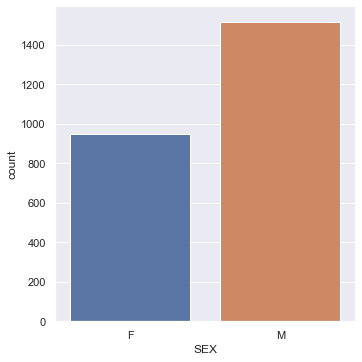

In [124]:
sns.catplot(data = df_final, x = 'SEX', kind = 'count')
plt.show()

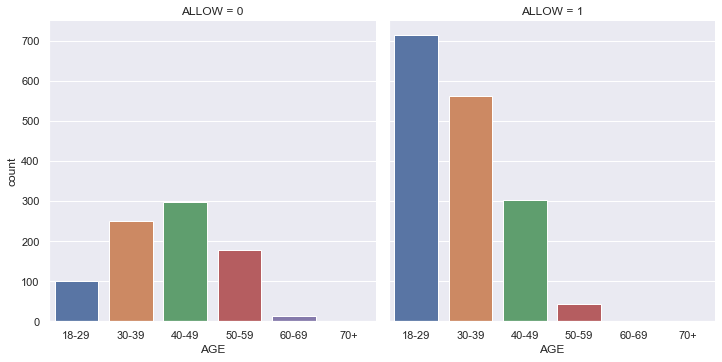

In [125]:
sns.catplot(data = df_final, x = 'AGE', col = 'ALLOW', kind = 'count')
plt.show()

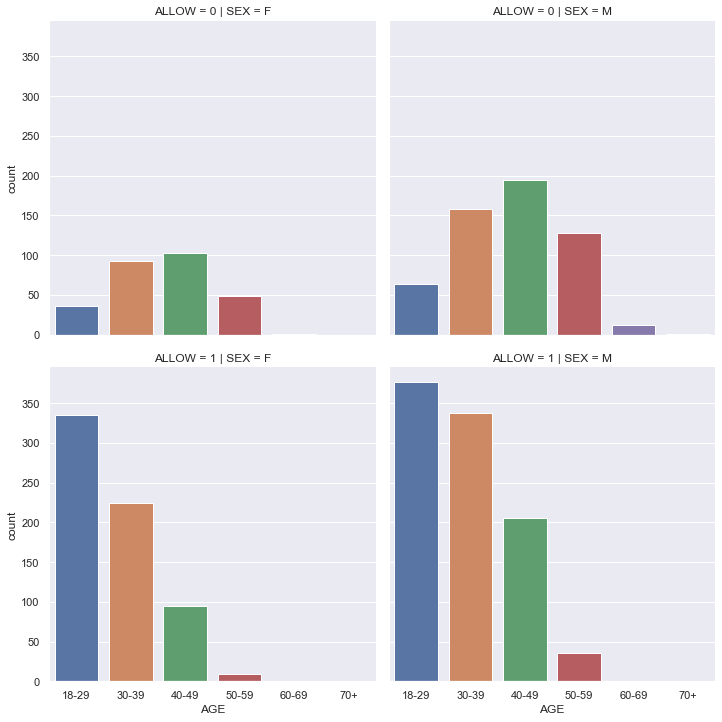

In [126]:
sns.catplot(data = df_final, x = 'AGE', kind = 'count', col = 'SEX', row = 'ALLOW')
plt.show()

In [127]:
numeric_vars = [column for column in df_final.columns if df_final.nunique()[column] > 104]
cat_vars = [column for column in df_final.columns if column not in numeric_vars]

<AxesSubplot:xlabel='LOAN_AMOUNT', ylabel='Count'>

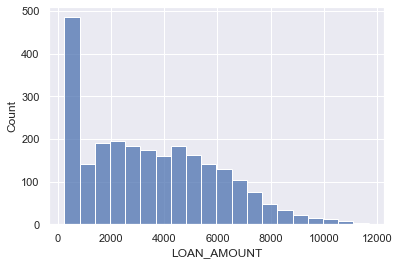

In [128]:
sns.histplot(data = df_final['LOAN_AMOUNT'])

Podemos identificar uma alta concentração de valores outliers para as variáveis CHECKING_BALANCE e EXISTING_SAVINGS

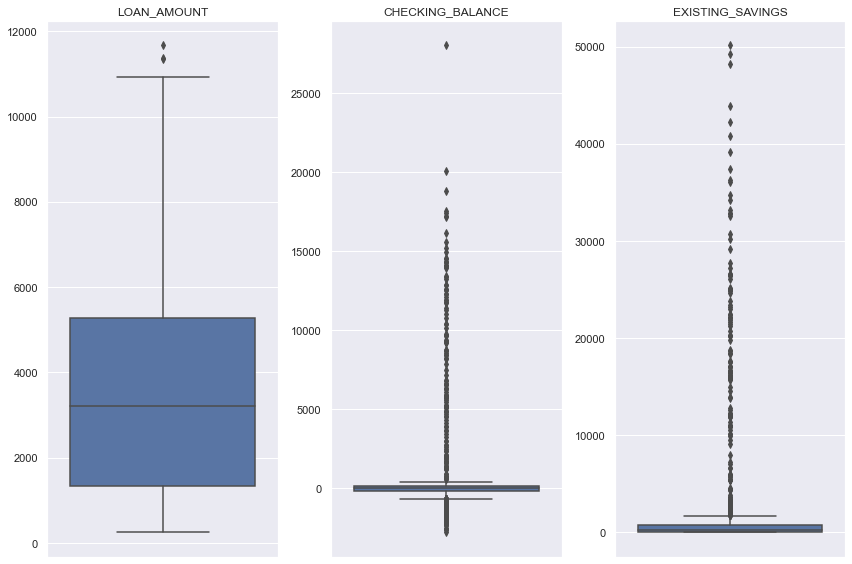

In [129]:
fig, axes = plt.subplots(1, 3, figsize = (12,8))

for index, column in enumerate(numeric_vars) : 
    sns.boxplot(data = df_final, y = column, ax = axes[index])
    axes[index].set_title(column)
    axes[index].set_ylabel('')
    fig.tight_layout()

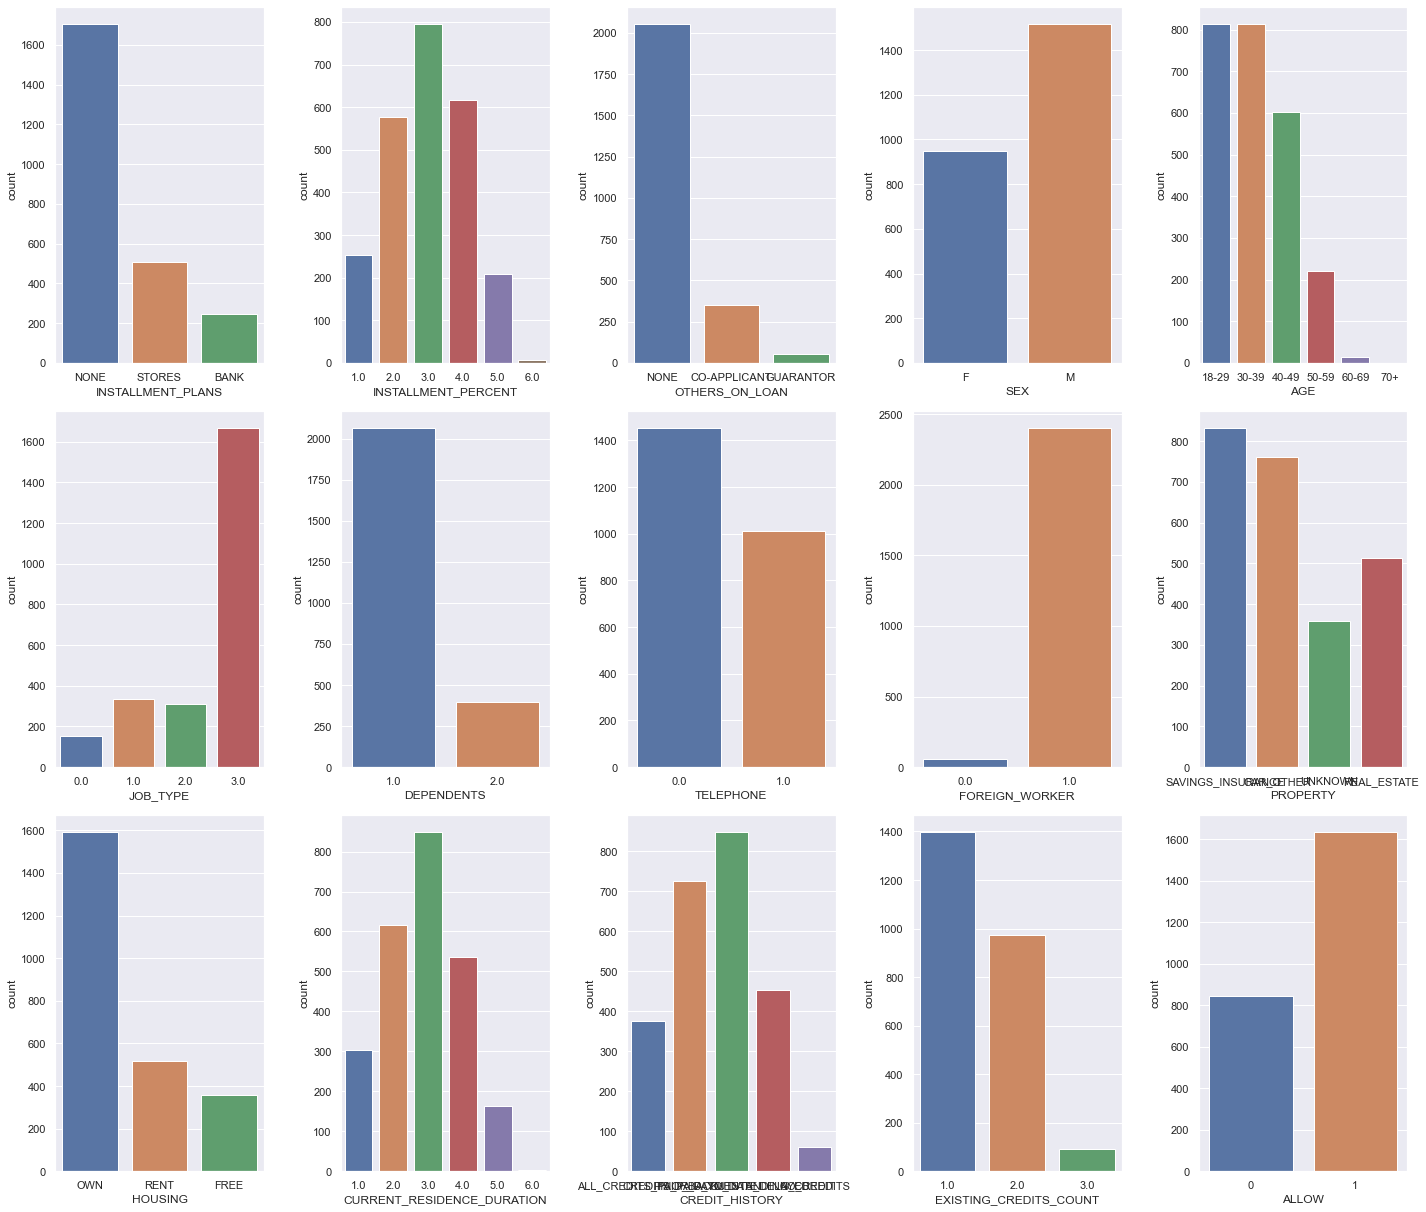

In [130]:
fig, axes = plt.subplots(3,5,figsize=(20,17))

ax_row = 0
ax_col = 0

for column in df_final[[column for column in cat_vars if df_final[column].nunique() <= 6]].columns :
    sns.countplot(data = df_final, x = column, ax = axes[ax_row, ax_col])
    
    ax_col += 1
    if ax_col > 4 :
        ax_col = 0
        ax_row += 1
fig.tight_layout()

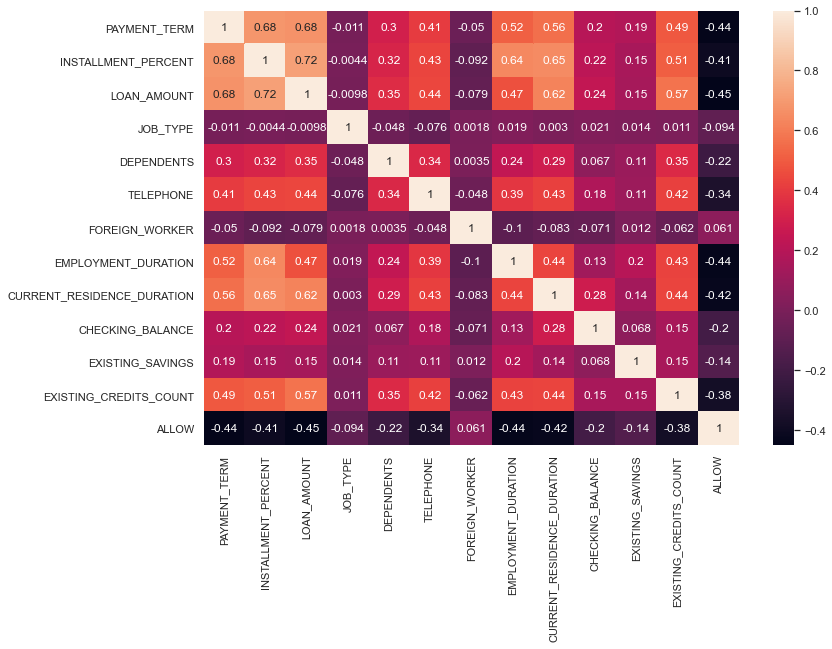

In [131]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(df_final.corr(), annot = True)
plt.show()

Também podemos identificar abaixo que nossa variável target ```ALLOW``` está desbalanceada, podemos posteriormente aplicar alguma técnica, como o SMOTE, para realizar o balanceamento da nossa variável.

<AxesSubplot:xlabel='ALLOW', ylabel='count'>

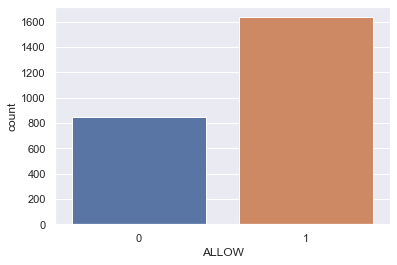

In [132]:
sns.countplot(data = df_final, x = 'ALLOW')

## **4. Criação do Modelo**

Primeiro, iremos realizar as avaliações do modelo sem realizar alterações em nossas variáveis.

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [134]:
def roda_modelo(mdl, X, y) :
    """"
    :param mdl : Tupla de modelos contendo nome e instância do modelo
    :X : Variáveis Independentes / Previsoras
    :y : Variável Dependente / Target
    """
    resultados_dataframe = pd.DataFrame(columns = ['Modelo', 'Accuracy_Train', 'F1-score_train', 'Accuracy_Test', 'F1-score_test'])
    
    for name, model in mdl :
        np.random.seed(193467)
        # print(f'------------{name}-----------')
        acc_results_test = []
        f1_results_test = []
        
        acc_results_train = []
        f1_results_train = []
        
        rkf = RepeatedKFold(n_splits = 2, n_repeats = 10, random_state = 193467)
        
        for linhas_train, linhas_test in rkf.split(X) :
    
            X_train, X_test = X.iloc[linhas_train], X.iloc[linhas_test]
            y_train, y_test = y.iloc[linhas_train], y.iloc[linhas_test]
            
            modelo = model
            modelo.fit(X_train, y_train)
    
            pred_test = modelo.predict(X_test)
            acc_test = accuracy_score(y_test, pred_test)
            f1_test = f1_score(y_test, pred_test)
            acc_results_test.append(acc_test)
            f1_results_test.append(f1_test)
            
            pred_train = modelo.predict(X_train)
            acc_train = accuracy_score(y_train, pred_train)
            f1_train = f1_score(y_train, pred_train)
            acc_results_train.append(acc_train)
            f1_results_train.append(f1_train)
            
            #print(f'Acc : {acc}\nF1_score : {f1}')
            #print()
        
        accuracy_test = np.mean(acc_results_test)
        f1_Score_test = np.mean(f1_results_test)
        
        accuracy_train = np.mean(acc_results_train)
        f1_Score_train = np.mean(f1_results_train)
        
        resultados_dataframe = resultados_dataframe.append({'Modelo' : name, 'Accuracy_Train' : accuracy_train, 'F1-score_train' : f1_Score_train, 'Accuracy_Test' : accuracy_test, 'F1-score_test' : f1_Score_test}, 
                                                           ignore_index=True)
    
    return resultados_dataframe

Abaixo, realizamos a transformação dos valores NaN das colunas ```CHECKING_BALANCE``` e ```EXISTING_SAVINGS``` na média agrupada por ```AGE```, ```SEX``` e ```JOB_TYPE```

In [135]:
def transform_to_mean(df) :
    df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].fillna(df.groupby(['AGE', 'SEX', 'JOB_TYPE'])['CHECKING_BALANCE'].transform('mean'))
    df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].fillna(df.groupby(['AGE', 'SEX', 'JOB_TYPE'])['EXISTING_SAVINGS'].transform('mean'))
    
    return df

df_final = transform_to_mean(df_final)
answers = transform_to_mean(answers)

In [103]:
df_final_new = df_final.copy()

X = df_final_new.dropna().select_dtypes(exclude='object').iloc[:,:-1]
y = df_final_new.dropna().iloc[:,-1]

modelos = [('RandomForest', RandomForestClassifier(max_depth=100, n_jobs=-1)), 
           ('LogisticRegression', LogisticRegression(max_iter=3000)),
           ('DecisionTree', DecisionTreeClassifier(max_depth=100)),
           ('AdaBoost', AdaBoostClassifier()),
           ('Xgboost', xgb.XGBRFClassifier(use_label_encoder =False, eval_metric='mlogloss'))]

resultados = roda_modelo(modelos, X, y)

Como primeiro resultado, podemos realizar a verificação que nossos modelos de árvore (RandomForest e DecisionTree) estão tendo Overfitting (sobreajuste, aprendendo demais sobre os dados), o que pode acarretar em uma má generealização do modelo.

Como melhores resultados, podemos verificar que o XGBOOST teve a melhor acurácia e F1-score, se desconsiderarmos a RandomForest.

In [104]:
resultados

,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,0.999955,0.999967,0.772569,0.834906
1,LogisticRegression,0.771855,0.832849,0.765433,0.828010
2,DecisionTree,1.000000,1.000000,0.690410,0.764255
3,AdaBoost,0.804683,0.856146,0.765343,0.826590
4,Xgboost,0.870027,0.904964,0.772346,0.834082


## **5. Transformação de Atributos**

In [136]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 291655 to 5547
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PAYMENT_TERM                2460 non-null   float64
 1   INSTALLMENT_PLANS           2462 non-null   object 
 2   INSTALLMENT_PERCENT         2459 non-null   float64
 3   LOAN_PURPOSE                2467 non-null   object 
 4   LOAN_AMOUNT                 2466 non-null   float64
 5   OTHERS_ON_LOAN              2464 non-null   object 
 6   SEX                         2467 non-null   object 
 7   AGE                         2465 non-null   object 
 8   JOB_TYPE                    2464 non-null   float64
 9   DEPENDENTS                  2461 non-null   float64
 10  TELEPHONE                   2464 non-null   float64
 11  FOREIGN_WORKER              2463 non-null   float64
 12  EMPLOYMENT_DURATION         2472 non-null   float64
 13  PROPERTY                    

In [153]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [140]:
numeric_vars.append('PAYMENT_TERM')
feat_encod = [x for x in df_final.columns if df_final.dtypes[x] == 'object']
feat_encod

['INSTALLMENT_PLANS',
 'LOAN_PURPOSE',
 'OTHERS_ON_LOAN',
 'SEX',
 'AGE',
 'PROPERTY',
 'HOUSING',
 'CREDIT_HISTORY']

In [141]:
df_final_alt = df_final.copy()
answers_alt = answers.copy()

In [142]:
df_final_alt[feat_encod] = df_final_alt[feat_encod].fillna('NONE')
answers_alt[feat_encod] = answers_alt[feat_encod].fillna('NONE')

In [144]:
# Utilizando StandardScaler() e OneHotEncoder()
enc = OneHotEncoder(cols = feat_encod, use_cat_names=True)
enc.fit(df_final_alt)
df_final_alt_ohe = enc.transform(df_final_alt)
df_final_alt_ohe = df_final_alt_ohe.fillna(-1)
df_final_alt_ohe[numeric_vars] = StandardScaler().fit_transform(df_final_alt_ohe[numeric_vars])

X = df_final_alt_ohe.iloc[:,:-1]
y = df_final_alt_ohe.iloc[:,-1]

resultados_ohe = roda_modelo(modelos, X, y)
resultados_ohe

,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,1.000000,1.000000,0.787847,0.848085
1,LogisticRegression,0.804359,0.858031,0.787121,0.845386
2,DecisionTree,1.000000,1.000000,0.704478,0.774701
3,AdaBoost,0.815784,0.864799,0.775253,0.834878
4,Xgboost,0.872709,0.909174,0.783567,0.845556


In [154]:
enc = OneHotEncoder(cols = feat_encod, use_cat_names=True)
enc.fit(df_final_alt)
df_final_alt_ohe = enc.transform(df_final_alt)
df_final_alt_ohe = df_final_alt_ohe.fillna(-1)
df_final_alt_ohe[numeric_vars] = MinMaxScaler().fit_transform(df_final_alt_ohe[numeric_vars])

X = df_final_alt_ohe.iloc[:,:-1]
y = df_final_alt_ohe.iloc[:,-1]

resultados_ohe = roda_modelo(modelos, X, y)
resultados_ohe

,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,1.000000,1.000000,0.788049,0.848215
1,LogisticRegression,0.805085,0.858728,0.788413,0.846627
2,DecisionTree,1.000000,1.000000,0.704438,0.774677
3,AdaBoost,0.815784,0.864799,0.775253,0.834878
4,Xgboost,0.872709,0.909174,0.783567,0.845556


Podemos verificar até o momento que o melhor modelo foi o de regressão logística realizando a aplicação do One Hot Encoder() e do MinMaxScaler() para as variáveis numéricas.

## **7. Feature Selection**

In [167]:
from sklearn.ensemble import ExtraTreesClassifier

In [171]:
def feature_selection_tree(X, y) :
    resultados_dataframe = pd.DataFrame({'variavel' : X.columns})
    rkf = RepeatedKFold(n_splits = 2, n_repeats = 5, random_state = 193467)
    repeat = 0

    for linhas_train, linhas_test in rkf.split(X) :
        repeat += 1
        X_train, X_test = X.iloc[linhas_train], X.iloc[linhas_test]
        y_train, y_test = y.iloc[linhas_train], y.iloc[linhas_test]
    
        modelo = ExtraTreesClassifier(random_state = 1534)
        
        modelo.fit(X_train, y_train)
    
        resultados_dataframe[f'repeat_{repeat}'] = modelo.feature_importances_
    
    return resultados_dataframe.set_index('variavel').sum(axis = 1).sort_values(ascending = False)

In [172]:
X = df_final_alt_ohe.iloc[:,:-1]
y = df_final_alt_ohe.iloc[:,-1]

feature_selection_ohe = feature_selection_tree(X, y)
feature_selection_ohe

variavel
CHECKING_BALANCE                         1.057617
LOAN_AMOUNT                              0.955686
PAYMENT_TERM                             0.944803
EMPLOYMENT_DURATION                      0.911489
EXISTING_SAVINGS                         0.816983
CURRENT_RESIDENCE_DURATION               0.537788
INSTALLMENT_PERCENT                      0.361828
PROPERTY_UNKNOWN                         0.340001
EXISTING_CREDITS_COUNT                   0.297585
TELEPHONE                                0.186468
OTHERS_ON_LOAN_NONE                      0.184473
HOUSING_FREE                             0.180870
JOB_TYPE                                 0.179714
CREDIT_HISTORY_OUTSTANDING_CREDIT        0.154424
SEX_F                                    0.141455
OTHERS_ON_LOAN_CO-APPLICANT              0.141354
SEX_M                                    0.138790
PROPERTY_SAVINGS_INSURANCE               0.136924
PROPERTY_CAR_OTHER                       0.131298
PROPERTY_REAL_ESTATE                     

### **Criação de Modelos Utilizando Feature Selection**

#### **Resultados One Hot Encoding com Feature Selection**

Abaixo, podemos verificar que aumentamos a acurácia utilizando as 25 variáveis selecionadas pela Feature Selection utilizando o ExtraTreesClassifier. 

In [169]:
X = df_final_alt_ohe[feature_selection_ohe[:25].index]
y = df_final_alt_ohe.iloc[:,-1]

resultados_ohe_fs = roda_modelo(modelos, X, y)
resultados_ohe_fs

,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,0.999957,0.999967,0.785704,0.846504
1,LogisticRegression,0.802576,0.857507,0.790726,0.848715
2,DecisionTree,1.000000,1.000000,0.706569,0.777034
3,AdaBoost,0.812238,0.862256,0.775398,0.834840
4,Xgboost,0.874582,0.910476,0.782055,0.844798


## 8. Tunagem de Parâmetros

In [205]:
from skopt import dummy_minimize
from skopt import BayesSearchCV
from skopt import forest_minimize

In [198]:
X = df_final_alt_ohe[feature_selection_ohe[:25].index]
y = df_final_alt_ohe.iloc[:,-1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.6)

modelo = LogisticRegression(random_state=193467, max_iter = 3000, verbose = 0)

param_grid = {
    'solver': ['liblinear', 'saga'],  
    'penalty': ['l1','l2'],
    'tol': (1e-5, 1e-3, 'log-uniform'),
    'fit_intercept': [True, False]
}

opt = BayesSearchCV(
    modelo,
    param_grid,
    n_iter=30,
    random_state=13478,
    verbose=0
)

opt.fit(Xtrain, ytrain)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Anaconda3\lib\site-packa

BayesSearchCV(estimator=LogisticRegression(max_iter=3000, random_state=193467),
              n_iter=30, random_state=13478,
              search_spaces={'fit_intercept': [True, False],
                             'penalty': ['l1', 'l2'],
                             'solver': ['liblinear', 'saga'],
                             'tol': (1e-05, 0.001, 'log-uniform')})

In [201]:
opt.best_estimator_

LogisticRegression(max_iter=3000, penalty='l1', random_state=193467,
                   solver='saga', tol=4.082130895592926e-05)

In [202]:
X = df_final_alt_ohe[feature_selection_ohe[:25].index]
y = df_final_alt_ohe.iloc[:,-1]

modelos = [('RandomForest', RandomForestClassifier(max_depth=100, n_jobs=-1)), 
           ('LogisticRegression', LogisticRegression(max_iter=3000)),
           ('DecisionTree', DecisionTreeClassifier(max_depth=100)),
           ('AdaBoost', AdaBoostClassifier()),
           ('Xgboost', xgb.XGBRFClassifier(use_label_encoder =False, eval_metric='mlogloss'))]

roda_modelo(modelos, X, y)

,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,1.000000,1.000000,0.786261,0.847050
1,LogisticRegression,0.800516,0.856140,0.790039,0.848322
2,DecisionTree,1.000000,1.000000,0.705066,0.775691
3,AdaBoost,0.813697,0.863489,0.775354,0.834696
4,Xgboost,0.874582,0.910487,0.781539,0.844438


In [204]:
X = df_final_alt_ohe[feature_selection_ohe[:25].index]
y = df_final_alt_ohe.iloc[:,-1]

modelos = [('RandomForest', RandomForestClassifier(max_depth=100, n_jobs=-1)), 
           ('LogisticRegression', LogisticRegression(max_iter=3000, penalty='l1', random_state=193467, solver='saga', tol=4e-05)),
           ('DecisionTree', DecisionTreeClassifier(max_depth=100)),
           ('AdaBoost', AdaBoostClassifier()),
           ('Xgboost', xgb.XGBRFClassifier(use_label_encoder =False, eval_metric='mlogloss'))]

roda_modelo(modelos, X, y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,1.000000,1.000000,0.786261,0.847050
1,LogisticRegression,0.799915,0.855635,0.790125,0.848332
2,DecisionTree,1.000000,1.000000,0.705066,0.775691
3,AdaBoost,0.813697,0.863489,0.775354,0.834696
4,Xgboost,0.874582,0.910487,0.781539,0.844438


In [215]:
from sklearn.model_selection import cross_val_score

def tune_xgbc(params):
# Implementation learned on a lesson of Mario Filho (Kagle Grandmaster) for parametes optmization.
# Link to the video: https://www.youtube.com/watch?v=WhnkeasZNHI

    """Function to be passed as scikit-optimize minimizer/maximizer input

    Parameters:
    Tuples with information about the range that the optimizer should use for that parameter, 
    as well as the behaviour that it should follow in that range.

    Returns:
    float: the metric that should be minimized. If the objective is maximization, then the negative 
    of the desired metric must be returned. In this case, the negative AUC average generated by CV is returned.
    """


    #Hyperparameters to be optimized
    learning_rate = params[0] 
    n_estimators = params[1] 
    max_depth = params[2]
    min_child_weight = params[3]
    gamma = params[4]
    subsample = params[5]
    colsample_bytree = params[6]
    
    print(params)
    
    mdl = xgb.XGBClassifier(learning_rate = learning_rate, 
                            n_estimators = n_estimators, 
                            max_depth = max_depth, 
                            min_child_weight = min_child_weight, 
                            gamma = gamma, 
                            subsample = subsample, 
                            colsample_bytree = colsample_bytree, 
                            seed = 193467, 
                            use_label_encoder=False,
                            verbosity = 0)
    
    accuracy = cross_val_score(mdl, Xtrain, ytrain, cv = 10, scoring = 'accuracy')
    print(accuracy.mean(), '\n')
    
    return accuracy.mean()
    
space = [(1e-3, 1e-1, 'log-uniform'), # learning rate
          (100, 2000), # n_estimators
          (1, 10), # max_depth 
          (1, 6.), # min_child_weight 
          (0, 0.5), # gamma 
          (0.5, 1.), # subsample 
          (0.5, 1.)] # colsample_bytree
    
resultado = forest_minimize(tune_xgbc, space, random_state = 42, n_random_starts = 20, n_calls  = 25, verbose = 1)

Iteration No: 1 started. Evaluating function at random point.
[0.03918194347141743, 1394, 8, 3.9932924209851834, 0.07800932022121827, 0.5779972601681014, 0.5290418060840998]
0.7845580678314491 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 20.2447
Function value obtained: 0.7846
Current minimum: 0.7846
Iteration No: 2 started. Evaluating function at random point.
[0.05399484409787437, 1223, 8, 4.540362888980228, 0.010292247147901225, 0.9849549260809973, 0.916221320400211]
0.7645066803699898 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 21.0134
Function value obtained: 0.7645
Current minimum: 0.7645
Iteration No: 3 started. Evaluating function at random point.
[0.0026587543983272693, 1315, 5, 4.087407548138583, 0.3058265802441405, 0.5035331526098588, 0.5115312125207079]
0.8024460431654676 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 20.0063
Function value obtained: 0.8024
Current minimum: 0.7645
Iteration No: 4 star

In [216]:
resultado.x

[0.05399484409787437,
 1223,
 8,
 4.540362888980228,
 0.010292247147901225,
 0.9849549260809973,
 0.916221320400211]

In [217]:
X = df_final_alt_ohe[feature_selection_ohe[:25].index]
y = df_final_alt_ohe.iloc[:,-1]

modelos = [('RandomForest', RandomForestClassifier(max_depth=100, n_jobs=-1)), 
           ('LogisticRegression', LogisticRegression(max_iter=3000, penalty='l1', random_state=193467, solver='saga', tol=4e-05)),
           ('DecisionTree', DecisionTreeClassifier(max_depth=100)),
           ('AdaBoost', AdaBoostClassifier()),
           ('Xgboost', xgb.XGBRFClassifier(learning_rate=0.053, n_estimators=1223, max_depth=8, min_child_weight=4.54, gamma=0.01, subsample=0.984954, colsample_bytree=0.91622,
                                           use_label_encoder =False, eval_metric='mlogloss', verbosity = 0))]

roda_modelo(modelos, X, y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,1.000000,1.000000,0.786261,0.847050
1,LogisticRegression,0.799915,0.855635,0.790125,0.848332
2,DecisionTree,1.000000,1.000000,0.705066,0.775691
3,AdaBoost,0.813697,0.863489,0.775354,0.834696
4,Xgboost,0.845858,0.889906,0.783214,0.845592


## **---------------------------------- Modelo Final Utilizado ----------------------------------**

In [1]:
# Manipulação dos dados
import pandas as pd

# Pacote matemático
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from skopt import forest_minimize

In [2]:
loans = pd.read_csv('data/LOANS.csv')
demographics = pd.read_csv('data/DEMOGRAPHICS.csv')
accounts = pd.read_csv('data/ACCOUNTS.csv')
answers_final = pd.read_csv('data/ANSWERS.csv')

In [3]:
index_list = [index for index in loans['ID'].values if (index in demographics['ID'].values) & (index in accounts['ID'].values)]
loans = loans.query('ID in @index_list').set_index('ID')
demographics = demographics.query('ID in @index_list').set_index('ID')
accounts = accounts.query('ID in @index_list').set_index('ID')
df_final = loans.join(demographics).join(accounts)
df_final.head()

,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW,SEX,AGE,JOB_TYPE,...,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
ID,,,,,,,,,,,,,,,,,,,,,
291655,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,1,F,24.0,3.0,...,1.0,1.0,0.0,SAVINGS_INSURANCE,OWN,2.0,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
657079,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,1,F,30.0,3.0,...,0.0,1.0,5.0,CAR_OTHER,RENT,1.0,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
256050,868.0,NONE,3.0,CAR_USED,8516.0,NONE,0,M,40.0,3.0,...,0.0,1.0,4.0,UNKNOWN,OWN,4.0,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
1039151,403.0,BANK,3.0,FURNITURE,2577.0,NONE,1,M,28.0,1.0,...,0.0,1.0,0.0,CAR_OTHER,OWN,3.0,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
1002660,810.0,NONE,4.0,BUSINESS,3750.0,NONE,1,M,19.0,2.0,...,0.0,1.0,3.0,REAL_ESTATE,OWN,3.0,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


In [4]:
len(df_final)

2477

In [409]:
answers = answers_final.copy()
answers = answers.set_index('ID')
answers['ALLOW'] = 0

In [410]:
y = df_final['ALLOW']
df_final.drop('ALLOW', axis = 1, inplace=True)
df_final['ALLOW'] = y

In [411]:
def transformations(df) :
    df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].map(lambda x : np.nan if x == 'UNKNOWN' else x).astype('float64')
    df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].map(lambda x : np.nan if x == 'NO_CHECKING' else x).astype('float64')
    
    # Transformar AGE em categoria
    bins = [19, 30, 40, 50, 60, 70, 120]
    labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
    df['AGE'] = pd.cut(df['AGE'], bins, labels = labels, include_lowest = True).astype('object') #Necessário para alterar de category para object (posteriormente é realizado o One Hot Encoder)
    
    df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].fillna(df.groupby(['AGE', 'SEX', 'JOB_TYPE'])['CHECKING_BALANCE'].transform('mean'))
    df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].fillna(df.groupby(['AGE', 'SEX', 'JOB_TYPE'])['EXISTING_SAVINGS'].transform('mean'))
    
    numeric_vars = [column for column in df.columns if df.nunique()[column] > 104]
    numeric_vars.append('PAYMENT_TERM')
    feat_encod = [x for x in df.columns if df.dtypes[x] == 'object']
    
    df[feat_encod] = df[feat_encod].fillna('NONE')
    
    enc = OneHotEncoder(cols = feat_encod, use_cat_names=True)
    enc.fit(df)
    df = enc.transform(df)
    df = df.fillna(-1)
    df[numeric_vars] = MinMaxScaler().fit_transform(df[numeric_vars])
    
    return df

In [412]:
df_final = transformations(df_final)
answers = transformations(answers)

In [413]:
df_final.head()

,PAYMENT_TERM,INSTALLMENT_PLANS_NONE,INSTALLMENT_PLANS_STORES,INSTALLMENT_PLANS_BANK,INSTALLMENT_PERCENT,LOAN_PURPOSE_CAR_NEW,LOAN_PURPOSE_CAR_USED,LOAN_PURPOSE_FURNITURE,LOAN_PURPOSE_BUSINESS,LOAN_PURPOSE_APPLIANCES,...,CHECKING_BALANCE,CREDIT_HISTORY_ALL_CREDITS_PAID_BACK,CREDIT_HISTORY_CREDITS_PAID_TO_DATE,CREDIT_HISTORY_PRIOR_PAYMENTS_DELAYED,CREDIT_HISTORY_OUTSTANDING_CREDIT,CREDIT_HISTORY_NO_CREDITS,CREDIT_HISTORY_NONE,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,ALLOW
ID,,,,,,,,,,,,,,,,,,,,,
291655,0.156675,1,0,0,2.0,1,0,0,0,0,...,0.072336,1,0,0,0,0,0,0.000746,1.0,1
657079,0.317884,0,1,0,3.0,1,0,0,0,0,...,0.036451,0,1,0,0,0,0,0.000476,1.0,1
256050,0.437783,1,0,0,3.0,0,1,0,0,0,...,0.106781,0,1,0,0,0,0,0.008995,2.0,0
1039151,0.203526,0,0,1,3.0,0,0,1,0,0,...,0.043005,0,0,1,0,0,0,0.016077,2.0,1
1002660,0.408564,1,0,0,4.0,0,0,0,1,0,...,0.125742,0,1,0,0,0,0,0.005900,1.0,1


In [414]:
answers.head()

,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY_NO_CREDITS,CREDIT_HISTORY_ALL_CREDITS_PAID_BACK,CREDIT_HISTORY_PRIOR_PAYMENTS_DELAYED,CREDIT_HISTORY_OUTSTANDING_CREDIT,CREDIT_HISTORY_CREDITS_PAID_TO_DATE,LOAN_PURPOSE_CAR_NEW,LOAN_PURPOSE_RADIO_TV,LOAN_PURPOSE_CAR_USED,...,INSTALLMENT_PLANS_BANK,HOUSING_OWN,HOUSING_RENT,HOUSING_FREE,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
ID,,,,,,,,,,,,,,,,,,,,,
1078506,0.103855,0.201754,1,0,0,0,0,1,0,0,...,0,1,0,0,1,3,1,0,1,0
947575,0.084979,0.000000,0,1,0,0,0,1,0,0,...,0,0,1,0,1,3,1,0,1,0
133043,0.109678,0.238012,0,0,1,0,0,0,1,0,...,0,1,0,0,2,1,2,0,1,0
1031383,0.176607,0.350877,0,0,0,1,0,0,0,1,...,0,1,0,0,2,3,1,0,1,0
491563,0.110538,0.175439,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,2,1,1,0


In [416]:
columns_drop = [column for column in df_final.columns if column not in answers.columns]
df_final = df_final.drop(columns_drop, axis = 1)
df_final.head()

,PAYMENT_TERM,INSTALLMENT_PLANS_NONE,INSTALLMENT_PLANS_STORES,INSTALLMENT_PLANS_BANK,INSTALLMENT_PERCENT,LOAN_PURPOSE_CAR_NEW,LOAN_PURPOSE_CAR_USED,LOAN_PURPOSE_FURNITURE,LOAN_PURPOSE_BUSINESS,LOAN_PURPOSE_APPLIANCES,...,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY_ALL_CREDITS_PAID_BACK,CREDIT_HISTORY_CREDITS_PAID_TO_DATE,CREDIT_HISTORY_PRIOR_PAYMENTS_DELAYED,CREDIT_HISTORY_OUTSTANDING_CREDIT,CREDIT_HISTORY_NO_CREDITS,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,ALLOW
ID,,,,,,,,,,,,,,,,,,,,,
291655,0.156675,1,0,0,2.0,1,0,0,0,0,...,2.0,0.072336,1,0,0,0,0,0.000746,1.0,1
657079,0.317884,0,1,0,3.0,1,0,0,0,0,...,1.0,0.036451,0,1,0,0,0,0.000476,1.0,1
256050,0.437783,1,0,0,3.0,0,1,0,0,0,...,4.0,0.106781,0,1,0,0,0,0.008995,2.0,0
1039151,0.203526,0,0,1,3.0,0,0,1,0,0,...,3.0,0.043005,0,0,1,0,0,0.016077,2.0,1
1002660,0.408564,1,0,0,4.0,0,0,0,1,0,...,3.0,0.125742,0,1,0,0,0,0.005900,1.0,1


In [417]:
all(df_final.columns.sort_values() == answers.columns.sort_values())

True

### **---------------------------------- PRIMEIRO MODELO ----------------------------------**

In [418]:
def roda_modelo(mdl, X, y) :
    """"
    :param mdl : Tupla de modelos contendo nome e instância do modelo
    :X : Variáveis Independentes / Previsoras
    :y : Variável Dependente / Target
    """
    resultados_dataframe = pd.DataFrame(columns = ['Modelo', 'Accuracy_Train', 'F1-score_train', 'Accuracy_Test', 'F1-score_test'])
    
    for name, model in mdl :
        np.random.seed(193467)
        # print(f'------------{name}-----------')
        acc_results_test = []
        f1_results_test = []
        
        acc_results_train = []
        f1_results_train = []
        
        rkf = RepeatedKFold(n_splits = 2, n_repeats = 10, random_state = 193467)
        
        for linhas_train, linhas_test in rkf.split(X) :
    
            X_train, X_test = X.iloc[linhas_train], X.iloc[linhas_test]
            y_train, y_test = y.iloc[linhas_train], y.iloc[linhas_test]
            
            modelo = model
            modelo.fit(X_train, y_train)
    
            pred_test = modelo.predict(X_test)
            acc_test = accuracy_score(y_test, pred_test)
            f1_test = f1_score(y_test, pred_test)
            acc_results_test.append(acc_test)
            f1_results_test.append(f1_test)
            
            pred_train = modelo.predict(X_train)
            acc_train = accuracy_score(y_train, pred_train)
            f1_train = f1_score(y_train, pred_train)
            acc_results_train.append(acc_train)
            f1_results_train.append(f1_train)
            
            #print(f'Acc : {acc}\nF1_score : {f1}')
            #print()
        
        accuracy_test = np.mean(acc_results_test)
        f1_Score_test = np.mean(f1_results_test)
        
        accuracy_train = np.mean(acc_results_train)
        f1_Score_train = np.mean(f1_results_train)
        
        resultados_dataframe = resultados_dataframe.append({'Modelo' : name, 'Accuracy_Train' : accuracy_train, 'F1-score_train' : f1_Score_train, 'Accuracy_Test' : accuracy_test, 'F1-score_test' : f1_Score_test}, 
                                                           ignore_index=True)
    
    return resultados_dataframe

In [420]:
X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

modelos = [('RandomForest', RandomForestClassifier(max_depth=100, n_jobs=-1)), 
           ('LogisticRegression', LogisticRegression(max_iter=3000)),
           ('DecisionTree', DecisionTreeClassifier(max_depth=100)),
           ('AdaBoost', AdaBoostClassifier()),
           ('Xgboost', xgb.XGBRFClassifier(use_label_encoder =False, eval_metric='mlogloss'))]

roda_modelo(modelos, X, y)

,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,1.000000,1.000000,0.790956,0.850276
1,LogisticRegression,0.804520,0.858309,0.789059,0.847194
2,DecisionTree,1.000000,1.000000,0.702096,0.772368
3,AdaBoost,0.814572,0.863747,0.775293,0.834572
4,Xgboost,0.873435,0.909610,0.783325,0.845355


### **---------------------------------- FEATURE SELECTION ----------------------------------**

In [421]:
def feature_selection_tree(X, y) :
    resultados_dataframe = pd.DataFrame({'variavel' : X.columns})
    rkf = RepeatedKFold(n_splits = 2, n_repeats = 5, random_state = 193467)
    repeat = 0

    for linhas_train, linhas_test in rkf.split(X) :
        repeat += 1
        X_train, X_test = X.iloc[linhas_train], X.iloc[linhas_test]
        y_train, y_test = y.iloc[linhas_train], y.iloc[linhas_test]
    
        modelo = ExtraTreesClassifier(random_state = 1534)
        
        modelo.fit(X_train, y_train)
    
        resultados_dataframe[f'repeat_{repeat}'] = modelo.feature_importances_
    
    return resultados_dataframe.set_index('variavel').sum(axis = 1).sort_values(ascending = False)

X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

feature_selection = feature_selection_tree(X, y)
feature_selection

variavel
EMPLOYMENT_DURATION                      0.597355
LOAN_AMOUNT                              0.569995
PAYMENT_TERM                             0.562995
CURRENT_RESIDENCE_DURATION               0.508190
PROPERTY_UNKNOWN                         0.503583
CHECKING_BALANCE                         0.426061
EXISTING_SAVINGS                         0.395985
INSTALLMENT_PERCENT                      0.384566
TELEPHONE                                0.332724
EXISTING_CREDITS_COUNT                   0.332169
CREDIT_HISTORY_OUTSTANDING_CREDIT        0.270926
OTHERS_ON_LOAN_NONE                      0.264181
AGE_18-29                                0.256464
HOUSING_FREE                             0.245992
PROPERTY_REAL_ESTATE                     0.245335
AGE_50-59                                0.241677
JOB_TYPE                                 0.208374
OTHERS_ON_LOAN_CO-APPLICANT              0.193992
SEX_M                                    0.189701
SEX_F                                    

In [422]:
X = df_final[feature_selection[:22].index]
y = df_final.iloc[:,-1]

roda_modelo(modelos, X, y)

,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,0.999960,0.999969,0.789301,0.848795
1,LogisticRegression,0.802460,0.856839,0.794831,0.851580
2,DecisionTree,1.000000,1.000000,0.707547,0.777210
3,AdaBoost,0.813928,0.863421,0.775535,0.835000
4,Xgboost,0.869237,0.906691,0.785828,0.847093


### **---------------------------------- AJUSTE DE HIPERPARAMETROS ----------------------------------**

In [423]:
def tune_model(params):
    X = df_final[feature_selection[:22].index]
    y = df_final.iloc[:,-1]
    
    solver = params[0]
    penalty = params[1]
    tol = params[2]
    fit_intercept = params[3]
    
    print(params)
    
    mdl = LogisticRegression(solver=solver, penalty=penalty, tol=tol, fit_intercept=fit_intercept, random_state=193467, max_iter = 3000, verbose = 0)
    
    accuracy = cross_val_score(mdl, Xtrain, ytrain, cv = 10, scoring = 'accuracy')
    print(accuracy.mean(), '\n')
    
    return -accuracy.mean()

space = [('liblinear', 'saga'),
         ('l1', 'l2'),
         (1e-5, 1e-3, 'log-uniform'),
         ([True, False])]
    
resultado = forest_minimize(tune_model, space, random_state = 42, n_random_starts = 20, n_calls  = 35, verbose = 1)

Iteration No: 1 started. Evaluating function at random point.
['saga', 'l1', 0.000362561763457623, False]
0.7903031860226105 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.3462
Function value obtained: -0.7903
Current minimum: -0.7903
Iteration No: 2 started. Evaluating function at random point.
['liblinear', 'l1', 8.288916866885136e-05, True]
0.798879753340185 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.3090
Function value obtained: -0.7989
Current minimum: -0.7989
Iteration No: 3 started. Evaluating function at random point.
['liblinear', 'l2', 1.2966511753760402e-05, False]
0.7910174717368963 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1113
Function value obtained: -0.7910
Current minimum: -0.7989
Iteration No: 4 started. Evaluating function at random point.
['saga', 'l1', 0.0009647685075720105, False]
0.7910174717368961 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.1512
Functi

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7974563206577596 

Iteration No: 17 ended. Evaluation done at random point.
Time taken: 6.4608
Function value obtained: -0.7975
Current minimum: -0.7989
Iteration No: 18 started. Evaluating function at random point.
['liblinear', 'l1', 6.162586615353729e-05, True]
0.7995940390544707 

Iteration No: 18 ended. Evaluation done at random point.
Time taken: 0.3050
Function value obtained: -0.7996
Current minimum: -0.7996
Iteration No: 19 started. Evaluating function at random point.
['liblinear', 'l1', 0.0002646573170201435, False]
0.7910174717368961 

Iteration No: 19 ended. Evaluation done at random point.
Time taken: 0.2570
Function value obtained: -0.7910
Current minimum: -0.7996
Iteration No: 20 started. Evaluating function at random point.
['saga', 'l2', 0.00020051831708723885, False]
0.7910174717368963 

Iteration No: 20 ended. Evaluation done at random point.
Time taken: 1.3989
Function value obtained: -0.7910
Current minimum: -0.7996
Iteration No: 21 started. Searching for the ne

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7974563206577596 

Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 7.2963
Function value obtained: -0.7975
Current minimum: -0.7996
Iteration No: 31 started. Searching for the next optimal point.
['liblinear', 'l1', 0.0003670193176695922, True]
0.7981654676258992 

Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 0.5600
Function value obtained: -0.7982
Current minimum: -0.7996
Iteration No: 32 started. Searching for the next optimal point.
['liblinear', 'l1', 0.0005342690194474791, True]
0.796731757451182 

Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.4830
Function value obtained: -0.7967
Current minimum: -0.7996
Iteration No: 33 started. Searching for the next optimal point.
['liblinear', 'l1', 0.0002590310199657716, True]
0.798879753340185 

Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.6060
Function value obtained: -0.7989
Current minimum: -0.7996

In [424]:
resultado.x

['liblinear', 'l1', 6.162586615353729e-05, True]

In [425]:
X = df_final[feature_selection[:22].index]
y = df_final.iloc[:,-1]

modelos = [('RandomForest', RandomForestClassifier(max_depth=100, n_jobs=-1)), 
           ('LogisticRegression', LogisticRegression(solver = 'liblinear', penalty='l1', tol=6.16e-06, fit_intercept=True, max_iter=3000, random_state=193467)),
           ('DecisionTree', DecisionTreeClassifier(max_depth=100)),
           ('AdaBoost', AdaBoostClassifier()),
           ('Xgboost', xgb.XGBRFClassifier(use_label_encoder =False, eval_metric='mlogloss'))]

roda_modelo(modelos, X, y)

,Modelo,Accuracy_Train,F1-score_train,Accuracy_Test,F1-score_test
0,RandomForest,0.999960,0.999969,0.789301,0.848795
1,LogisticRegression,0.801613,0.856324,0.793903,0.850886
2,DecisionTree,1.000000,1.000000,0.707547,0.777210
3,AdaBoost,0.813928,0.863421,0.775535,0.835000
4,Xgboost,0.869237,0.906691,0.785828,0.847093


### **---------------------------------- FINALIZANDO PARA SUBMISSÃO ----------------------------------**

In [429]:
df_final.head()

,PAYMENT_TERM,INSTALLMENT_PLANS_NONE,INSTALLMENT_PLANS_STORES,INSTALLMENT_PLANS_BANK,INSTALLMENT_PERCENT,LOAN_PURPOSE_CAR_NEW,LOAN_PURPOSE_CAR_USED,LOAN_PURPOSE_FURNITURE,LOAN_PURPOSE_BUSINESS,LOAN_PURPOSE_APPLIANCES,...,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY_ALL_CREDITS_PAID_BACK,CREDIT_HISTORY_CREDITS_PAID_TO_DATE,CREDIT_HISTORY_PRIOR_PAYMENTS_DELAYED,CREDIT_HISTORY_OUTSTANDING_CREDIT,CREDIT_HISTORY_NO_CREDITS,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,ALLOW
ID,,,,,,,,,,,,,,,,,,,,,
291655,0.156675,1,0,0,2.0,1,0,0,0,0,...,2.0,0.072336,1,0,0,0,0,0.000746,1.0,1
657079,0.317884,0,1,0,3.0,1,0,0,0,0,...,1.0,0.036451,0,1,0,0,0,0.000476,1.0,1
256050,0.437783,1,0,0,3.0,0,1,0,0,0,...,4.0,0.106781,0,1,0,0,0,0.008995,2.0,0
1039151,0.203526,0,0,1,3.0,0,0,1,0,0,...,3.0,0.043005,0,0,1,0,0,0.016077,2.0,1
1002660,0.408564,1,0,0,4.0,0,0,0,1,0,...,3.0,0.125742,0,1,0,0,0,0.005900,1.0,1


In [430]:
answers.head()

,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY_NO_CREDITS,CREDIT_HISTORY_ALL_CREDITS_PAID_BACK,CREDIT_HISTORY_PRIOR_PAYMENTS_DELAYED,CREDIT_HISTORY_OUTSTANDING_CREDIT,CREDIT_HISTORY_CREDITS_PAID_TO_DATE,LOAN_PURPOSE_CAR_NEW,LOAN_PURPOSE_RADIO_TV,LOAN_PURPOSE_CAR_USED,...,INSTALLMENT_PLANS_BANK,HOUSING_OWN,HOUSING_RENT,HOUSING_FREE,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
ID,,,,,,,,,,,,,,,,,,,,,
1078506,0.103855,0.201754,1,0,0,0,0,1,0,0,...,0,1,0,0,1,3,1,0,1,0
947575,0.084979,0.000000,0,1,0,0,0,1,0,0,...,0,0,1,0,1,3,1,0,1,0
133043,0.109678,0.238012,0,0,1,0,0,0,1,0,...,0,1,0,0,2,1,2,0,1,0
1031383,0.176607,0.350877,0,0,0,1,0,0,0,1,...,0,1,0,0,2,3,1,0,1,0
491563,0.110538,0.175439,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,2,1,1,0


In [436]:
X = df_final[feature_selection[:22].index]
y = df_final.iloc[:,-1]

mdl = LogisticRegression(solver = 'liblinear', penalty='l1', tol=6.16e-06, fit_intercept=True, max_iter=3000, random_state=193467)
mdl.fit(X, y)
pred = mdl.predict(answers.iloc[:,:-1][feature_selection[:22].index])

answers_final['ALLOW'] = pred
answers_final

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,1
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,1
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,1
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,1
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1023481,NO_CHECKING,1116,PRIOR_PAYMENTS_DELAYED,APPLIANCES,3960,1224.22,8,4,F,...,SAVINGS_INSURANCE,46,NONE,OWN,2,2,1,0,0,0
996,1211101,-399.5,720,ALL_CREDITS_PAID_BACK,CAR_NEW,1834,57.44,7,3,M,...,SAVINGS_INSURANCE,27,NONE,OWN,1,3,1,0,1,1
997,599972,158.3,558,CREDITS_PAID_TO_DATE,CAR_NEW,2348,520.17,1,3,M,...,SAVINGS_INSURANCE,42,STORES,OWN,1,1,1,0,1,1
998,1146844,NO_CHECKING,1170,PRIOR_PAYMENTS_DELAYED,FURNITURE,5457,531.02,4,3,M,...,CAR_OTHER,42,NONE,OWN,1,3,1,1,1,0


In [441]:
answers_final.to_csv('submission.csv', index=False)